### Pong - Reinforcement Learning

If you run this notebook on a remote AWS EC2 GPU server you first need to install the xvfb package. Assuming the server is running Ubuntu 18.04 you can do this with:

    sudo apt-get update -y  
    sudo apt-get install -y xvfb freeglut3-dev

Then start a screen session with the command:

    screen

This will prevent the notebook from exiting if your ssh session disconnects. Once in the screen session start your notebook with:

    jupyter notebook --no-browser --ip=<EXTERNAL_IP_ADDRESS>

On an EC2 server running Ubuntu 18.04 with updated nvidia drivers the notebook should run without problems. However on older OS or with outdated drivers you could run into plenty of trouble related to "headless" rendering of opengl.  

In [1]:
import sys
import os

In [2]:
p0 = os.path.abspath('.')
p1 = os.path.abspath(os.path.join(p0, '..'))

sys.path.insert(0, p1)

In [3]:
import jupylet.rl

In [4]:
import PIL.Image

import numpy as np

import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
def show_images(iml, columns=4, figsize=(17, 8)):
    plt.figure(figsize=figsize)
    for i, image in enumerate(iml):
        plt.subplot(len(iml) / columns + 1, columns, i + 1)
        plt.axis('off')
        plt.imshow(image)

In [7]:
pong = jupylet.rl.GameProcess('pong')

In [8]:
pong.start()

In [9]:
%timeit -n100 _ = pong.step()

1.94 ms ± 38.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


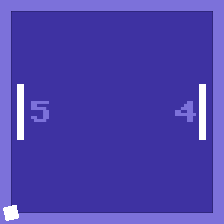

In [10]:
PIL.Image.fromarray(pong.get_observation())

In [11]:
games = jupylet.rl.Games(['pong', 'pong', 'pong', 'pong', 'pong', 'pong', 'pong', 'pong'])

In [12]:
games.start()

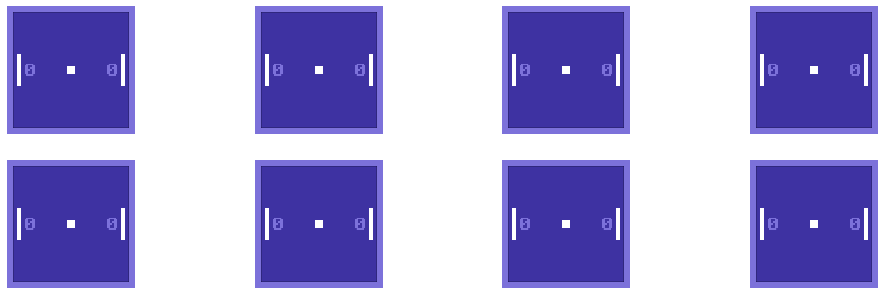

In [13]:
show_images(games.get_observation())

In [14]:
player0 = np.random.randint(0, 2, (len(games.games), 5))
player0

array([[0, 0, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1],
       [0, 1, 0, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [15]:
player1 = np.random.randint(0, 2, (len(games.games), 5))
player1

array([[1, 0, 1, 0, 0],
       [1, 0, 1, 0, 1],
       [0, 0, 0, 1, 1],
       [1, 1, 0, 0, 1],
       [0, 1, 0, 0, 1],
       [0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1],
       [1, 1, 1, 0, 1]])

In [16]:
%timeit -n20 games.step(player0, player1)

3.22 ms ± 88.5 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


In [17]:
sl = games.step(player0, player1)

In [18]:
al = [s.pop('screen0') for s in sl]

In [19]:
sl

[{'player0': {'score': 1, 'reward': 0}, 'player1': {'score': 1, 'reward': 0}},
 {'player0': {'score': 1, 'reward': 0}, 'player1': {'score': 1, 'reward': 0}},
 {'player0': {'score': 1, 'reward': 0}, 'player1': {'score': 1, 'reward': 0}},
 {'player0': {'score': 1, 'reward': 0}, 'player1': {'score': 1, 'reward': 0}},
 {'player0': {'score': 0, 'reward': 0}, 'player1': {'score': 1, 'reward': 0}},
 {'player0': {'score': 0, 'reward': 0}, 'player1': {'score': 1, 'reward': 0}},
 {'player0': {'score': 1, 'reward': 0}, 'player1': {'score': 1, 'reward': 0}},
 {'player0': {'score': 1, 'reward': 0}, 'player1': {'score': 1, 'reward': 0}}]

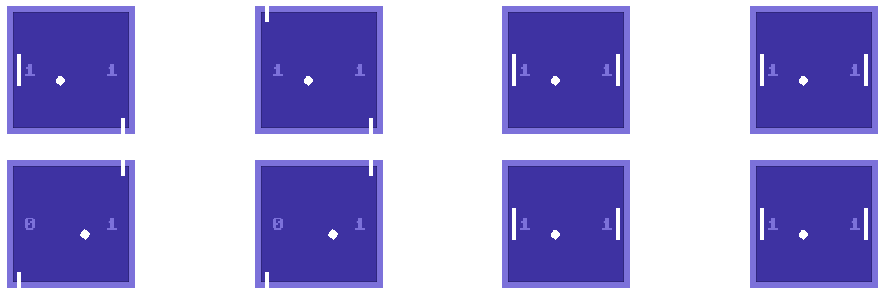

In [20]:
show_images(al)

In [21]:
batch = np.stack(al, 0).transpose(0, 3, 1, 2)
batch.shape

(8, 3, 224, 224)

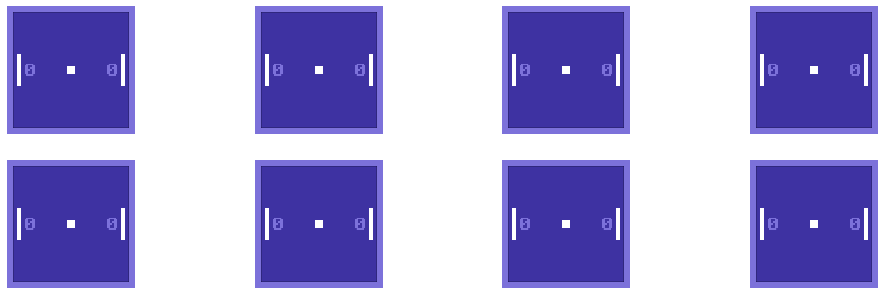

In [22]:
show_images(games.reset())